# Lime Example 

In [2]:
import lime
import sklearn
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from __future__ import print_function

### Fetching data, training a classifier
For this tutorial, we'll be using the 20 newsgroups dataset. In particular, for simplicity, we'll use a 2-class subset: atheism and christianity.

In [3]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)
class_names = ['atheism', 'christian']

In [4]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)

In [5]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(train_vectors, newsgroups_train.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [6]:
pred = rf.predict(test_vectors)
sklearn.metrics.f1_score(newsgroups_test.target, pred, average='binary')

0.92415402567094507

# Explaining predictions using lime

In [7]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, rf)

In [8]:
print(c.predict_proba([newsgroups_test.data[0]]))

[[ 0.278  0.722]]


In [9]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

In [10]:
idx = 83
exp = explainer.explain_instance(newsgroups_test.data[idx], c.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability(christian) =', c.predict_proba([newsgroups_test.data[idx]])[0,1])
print('True class: %s' % class_names[newsgroups_test.target[idx]])

/Users/taposh/anaconda/lib/python3.5/re.py:203: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


Document id: 83
Probability(christian) = 0.464
True class: atheism


In [11]:
exp.as_list()

[('Posting', -0.15178491472598793),
 ('Host', -0.11665785684314793),
 ('NNTP', -0.10352804583294961),
 ('edu', -0.034497708206410668),
 ('There', -0.012767383793923084),
 ('New', 0.011477168620465801)]

In [12]:
print('Original prediction:', rf.predict_proba(test_vectors[idx])[0,1])
tmp = test_vectors[idx].copy()
tmp[0,vectorizer.vocabulary_['Posting']] = 0
tmp[0,vectorizer.vocabulary_['Host']] = 0
print('Prediction removing some features:', rf.predict_proba(tmp)[0,1])
print('Difference:', rf.predict_proba(tmp)[0,1] - rf.predict_proba(test_vectors[idx])[0,1])

Original prediction: 0.464
Prediction removing some features: 0.708
Difference: 0.244


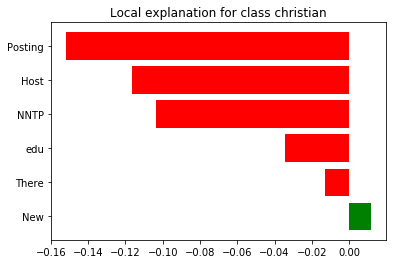

In [13]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [15]:
exp.show_in_notebook()

limit_output extension: Maximum message size of 10000 exceeded with 1201791 characters

In [16]:
exp.save_to_file('/tmp/oi.html')

In [17]:
exp.show_in_notebook(text=True)

limit_output extension: Maximum message size of 10000 exceeded with 1201791 characters